<a href="https://colab.research.google.com/github/hemang03/linearregression/blob/master/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [275]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [276]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)


In [277]:
mnist.data.shape

(70000, 784)

In [278]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

In [279]:
X.shape

(70000, 784)

In [280]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [281]:
X /= 255.0

In [282]:
X.min() , X.max()

(0.0, 1.0)

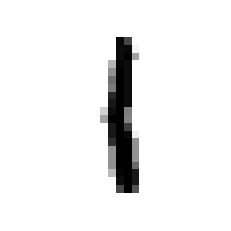

In [283]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
some_digit = X[35000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

In [284]:
y[35000]

1

In [285]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [286]:
X_test.shape

(10000, 784)

In [287]:
y_train_1= (y_train == 1)
y_test_1 = (y_test == 1)

In [288]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
model.fit(X_train , y_train_1)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [289]:
pred = model.predict([some_digit])

In [290]:
pred

array([ True])

In [291]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(model , X_train , y_train_9 , cv =10 , scoring= 'accuracy')

In [292]:
cv

array([0.9545    , 0.95916667, 0.957     , 0.96216667, 0.96216667,
       0.96333333, 0.956     , 0.948     , 0.92416667, 0.941     ])

In [293]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(model , X_train , y_train_9 , cv = 3 )

In [294]:
y_train_predict

array([False, False, False, ..., False, False, False])

In [295]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_9, y_train_predict)

array([[52881,  1170],
       [ 1470,  4479]])

In [298]:
y_train_perfect_predictions = y_train_1

In [299]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_9, y_train_perfect_predictions)

array([[47309,  6742],
       [ 5949,     0]])

In [300]:
from sklearn.metrics import precision_score , recall_score
precision_score(y_train_9, y_train_predict)

0.7928836962294211

In [301]:
recall_score(y_train_9 , y_train_predict)

0.7528996469994957

In [302]:
from sklearn.metrics import  f1_score
f1_score(y_train_9 , y_train_predict)

0.7723745473357474

In [303]:
y_scores = model.decision_function([some_digit])
y_scores

array([6.38371145])

In [304]:
threshold = 0
y_some_digit_predict = (y_scores > threshold)

In [305]:
y_some_digit_predict

array([ True])

In [306]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(model, X_train, y_train_1, cv=3,
                             method="decision_function")

In [307]:
y_scores

array([-16.49321546, -23.69074147, -13.79227986, ...,  -6.50278416,
       -15.83811248, -19.43343878])

In [308]:
from sklearn.metrics import precision_recall_curve

In [309]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_1, y_scores)


In [310]:
precisions

array([0.15494932, 0.1549299 , 0.15493346, ..., 1.        , 1.        ,
       1.        ])

In [311]:

y_train_pred_90 = (y_scores > 70000)

In [312]:
precision_score(y_train_1 , y_train_90)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [313]:
recall_score(y_train_1 , y_train_90)

0.0

In [315]:
from sklearn.metrics import roc_curve

In [316]:
roc_curve(y_train_1 , y_scores)

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.87765218e-05,
        1.87765218e-05, 3.75530437e-05, 3.75530437e-05, 5.63295655e-05,
        5.63295655e-05, 7.51060873e-05, 7.51060873e-05, 9.38826092e-05,
        9.38826092e-05, 1.12659131e-04, 1.12659131e-04, 1.31435653e-04,
        1.31435653e-04, 1.50212175e-04, 1.50212175e-04, 1.68988697e-04,
        1.68988697e-04, 1.87765218e-04, 1.87765218e-04, 2.06541740e-04,
        2.06541740e-04, 2.25318262e-04, 2.25318262e-04, 2.44094784e-04,
        2.44094784e-04, 2.62871306e-04, 2.62871306e-04, 2.81647828e-04,
        2.81647828e-04, 3.00424349e-04, 3.00424349e-04, 3.19200871e-04,
        3.19200871e-04, 3.37977393e-04, 3.37977393e-04, 3.56753915e-04,
        3.56753915e-04, 3.75530437e-04, 3.75530437e-04, 3.94306959e-04,
        3.94306959e-04, 4.13083480e-04, 4.13083480e-04, 4.31860002e-04,
        4.31860002e-04, 4.50636524e-04, 4.50636524e-04, 4.69413046e-04,
        4.69413046e-04, 4.88189568e-04, 4.88189568e-04, 5.069660

Text(0, 0.5, 'TPR')

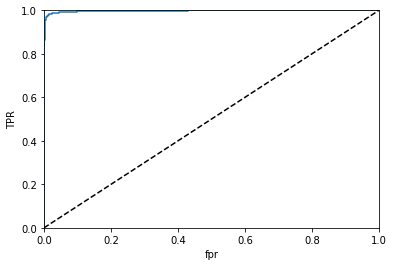

In [317]:
plt.plot(fpr , tpr , threshold)
plt.plot([0,1] ,[0,1] , "k--")
plt.axis([0,1,0,1] )
plt.xlabel('fpr')
plt.ylabel('TPR')

In [318]:

from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_1, y_scores)

0.997515232850204

In [273]:
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier()
model_1.fit(X_train , y_train_1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [319]:
y_proba_forest = cross_val_predict(model_1 , X_train , y_train_1 , cv =3 , method='predict_proba')

In [320]:
y_proba_forest

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.99, 0.01]])

In [321]:
y_scores_forest = y_proba_forest[: , 1]
fpr_forest , tpr_forest , threshold_forest = roc_curve(y_train_1 , y_scores_forest)

In [333]:
fpr_forest

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.87765218e-05,
       1.87765218e-05, 1.87765218e-05, 1.87765218e-05, 3.75530437e-05,
       3.75530437e-05, 3.75530437e-05, 3.75530437e-05, 5.63295655e-05,
       5.63295655e-05, 7.51060873e-05, 9.38826092e-05, 9.38826092e-05,
       9.38826092e-05, 9.38826092e-05, 1.12659131e-04, 1.31435653e-04,
       1.68988697e-04, 1.68988697e-04, 1.87765218e-04, 1.87765218e-04,
       2.25318262e-04, 2.25318262e-04, 2.25318262e-04, 2.25318262e-04,
       2.25318262e-04, 2.25318262e-04, 2.62871306e-04, 3.00424349e-04,
       3.37977393e-04, 3.56753915e-04, 3.75530437e-04, 3.75530437e-04,
       4.13083480e-04, 4.31860002e-04, 4.31860002e-04, 4.69413046e-04,
       5.06966090e-04, 6.38401742e-04, 7.13507830e-04, 7.69837395e-04,
      

In [334]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_1 , y_scores_forest)

0.9992842404914741

In [335]:
model.fit(X_train ,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [336]:
model.predict([some_digit])

array([1])

In [337]:
some_digits_score = model.decision_function([some_digit])

In [338]:
some_digits_score

array([[-48.10332615,   5.68911187,  -4.21316262,  -2.24988114,
        -12.9086839 ,  -5.54725069,  -6.10960891,  -5.52391009,
        -14.14103808,  -5.50038582]])

In [339]:
import numpy as np

In [340]:
np.argmax(some_digits_score)

1

In [341]:
from sklearn.multiclass import OneVsOneClassifier
ono_clf = OneVsOneClassifier(SGDClassifier(random_state=0))
ono_clf.fit(X_train , y_train)
ono_clf.predict([some_digit])

array([1])

In [342]:
len(ono_clf.estimators_)

45

In [346]:
model_1.fit(X_train ,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [347]:
model_1.predict([some_digit])

array([1])

In [348]:
model_1.predict_proba([some_digit])

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [349]:
cross_val_score(model_1 , X_train , y_train , cv =3 , scoring='accuracy')

array([0.9663, 0.9629, 0.9673])

In [351]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.astype(np.float64))

In [352]:
cross_val_score(model_1 , X_train , y_train , scoring='accuracy' , cv =3)

array([0.9648, 0.9637, 0.9671])

In [353]:
cross_val_predict(model_1 , X_train , y_train , cv = 3 , method='predict')

array([5, 0, 4, ..., 5, 6, 8])

In [356]:
from sklearn.metrics import confusion_matrix
cm_mat = confusion_matrix(y_train , y_train_predict)

In [357]:
cm_mat

array([[5920,    3,    0,    0,    0,    0,    0,    0,    0,    0],
       [6725,   17,    0,    0,    0,    0,    0,    0,    0,    0],
       [5916,   42,    0,    0,    0,    0,    0,    0,    0,    0],
       [6029,  102,    0,    0,    0,    0,    0,    0,    0,    0],
       [5574,  268,    0,    0,    0,    0,    0,    0,    0,    0],
       [5347,   74,    0,    0,    0,    0,    0,    0,    0,    0],
       [5915,    3,    0,    0,    0,    0,    0,    0,    0,    0],
       [5694,  571,    0,    0,    0,    0,    0,    0,    0,    0],
       [5761,   90,    0,    0,    0,    0,    0,    0,    0,    0],
       [1470, 4479,    0,    0,    0,    0,    0,    0,    0,    0]])

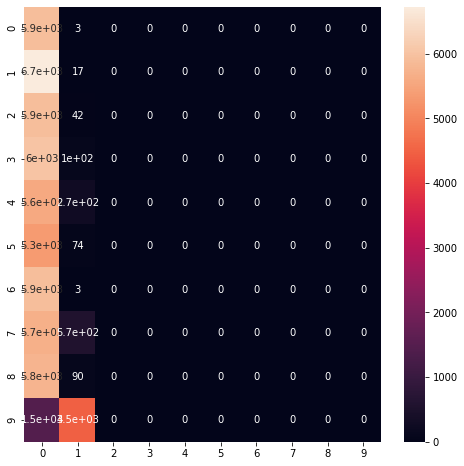

In [361]:
plt.figure(figsize=(8,8))
import seaborn as sns
sns.heatmap(cm_mat , annot = True)